In [1]:
#lets load dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading dataset to pandas dataframe
customer = pd.read_csv(r"C:\Users\bharathi.v04\Downloads\DS\Wholesale customers data.csv")

In [3]:
#print first 5 rows of dataset
customer.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
customer.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [5]:
#total rows & columns in dataset
customer.shape

(440, 8)

In [6]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
#getting statistical information
customer.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
#finding null values
customer.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

### Splitting data into X & Y

In [9]:
X = customer.drop(columns='Channel',axis=1)
Y = customer['Channel']

In [10]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [11]:
Y.head()

0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64

As we can see our target variable has value 1 & 2 lets convert to 0 & 1 for our convienience

In [12]:
Y[Y==1]=1
Y[Y==2]=0

In [13]:
#lets check the Y variable
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

In [14]:
#import XGBOOST
import xgboost as xgb

#define data_matrix
data_dmatrix = xgb.DMatrix(data=X,label=Y)

### Splitting data into train & test

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=0)

### Model Evaluation

In [16]:
from xgboost import XGBClassifier

#declare parameters
params={
    'objective':'binary:logistic',
    'max_depth':4,
    'alpha':10,
    'learning_rate':1.0,
    'n_estimators':100
}

#intantiate the classifiers
xgb_clf = XGBClassifier(**params)

#fit the classifier to the training data
xgb_clf.fit(X_train,Y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)

In [17]:
#viewing the parameters of xgb
print(xgb_clf)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)


In [18]:
y_predict = xgb_clf.predict(X_test)

### Checking the accuracy score

In [19]:
from sklearn.metrics import accuracy_score

In [22]:
print("XGBOOST Model Accuracy Score: {0:0.4f}".format(accuracy_score(Y_test,y_predict)))

XGBOOST Model Accuracy Score: 0.8864


### K-Fold Cross Validation using XGBoost

In [24]:
from xgboost import cv

params={'objective':'binary:logistic',
       'colsample_bytree':0.3,
       'learning_rate':0.1,
       'max_depth':5,
       'alpha':10}

xgb_cv = cv(dtrain=data_dmatrix,params=params,nfold=3,num_boost_round=50,
           early_stopping_rounds=10,metrics='auc',as_pandas=True,seed=123)

In [25]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.914999,0.009704,0.880965,0.021050
1,0.934374,0.013263,0.923562,0.022810
2,0.936252,0.013723,0.924433,0.025777
3,0.943878,0.009032,0.927152,0.022228
4,0.957881,0.008845,0.935191,0.016437


### Feature importance with XGBoost 

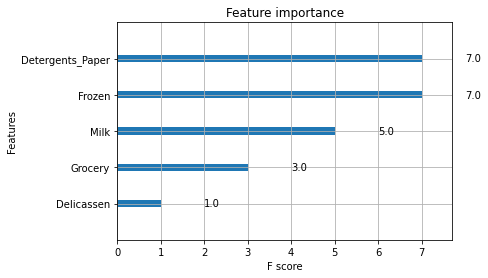

<Figure size 1152x864 with 0 Axes>

In [26]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize=(16,12))
plt.show()